# ***OVNIs, ¿realidad o ficción?***

---



#**Introducción**

Que los avistamientos existen, no caben dudas. Pero ¿Son objetos de procedencia extraterrestre o es simplemente un error o invención humana?

"Recientemente, muchos testigos creíbles, a menudo aviadores militares, han informado haber visto objetos que no reconocían sobre el espacio aéreo estadounidense", dice un informe independiente. "La mayoría de estos sucesos han sido explicados desde entonces, pero un pequeño puñado no pueden ser identificados inmediatamente como fenómenos conocidos de origen humano o natural".

Este informe insiste en la necesidad de un proceso científico e invoca a Thomas Jefferson, citando las reflexiones del tercer presidente de EE.UU. sobre conceptos aún no comprendidos: "Cada día se presentan mil fenómenos que no podemos explicar, pero cuando se sugieren hechos que no guardan analogía con las leyes de la naturaleza que aún conocemos, su veracidad necesita pruebas proporcionales a su dificultad".

En resumen, "afirmaciones extraordinarias requieren pruebas extraordinarias", dice el informe.

A partir de la información que podemos recolectar, ¿tenemos pruebas lo suficientemente contundentes o como dice el informe "extraordinarias" para demostrar estas afirmaciones que son aún más extraordinarias?


##Descripción temática
En este proyecto, se analizará la temática relacionada con los Avistamientos de OVNIs a lo largo de la historia.

Para esto se descargó un dataset que registra todos los avistamientos a la fecha, detallado lugar, fecha, tipo de OVNI y tiempo de avistamiento, entre otras cosas.

##Objetivo
A través de este proyecto intentaremos en primer lugar, determinar la fiabilidad de estos avistamientos en base a los datos y la posibilidad de que estos objetos sean o no extraterrestres.

En segundo lugar, concluir ciertos puntos como cuándo es más propenso a verse un OVNI e intentar determinar alguna relación entre las variables.

Por último, buscaremos predecir, de ser posible, algunos datos sobre el próximo avistamiento en base a la información disponible.


---

#**Obteniendo los datos**

## Importación de librerías y Drive

In [1]:
# @title
#Importar librerías
import pandas as pd #Importamos pandas para trabajar el dataset
import numpy as np #Importamos numpy
import seaborn as sns #Importamos seaborn para graficar
import matplotlib as mpl #Importamos matplotlib también para graficar
import matplotlib.pyplot as plt

In [2]:
# @title
# Conectamos con google drive
from google.colab import drive
import os
drive.mount("/content/gdrive")

%cd "/content/gdrive/MyDrive/"


Mounted at /content/gdrive
/content/gdrive/MyDrive


## Importación del Dataset

###Dataset

In [3]:
# @title
# Nuestro dataset
"""
Definimos nuestro dataset como df y lo traemos desde nuestro drive
Para esto le pedimos a pandas que lea nuestro fichero csv
Luego le pedimos que nos muestre las primeras 5 lineas del dataset
"""

df = pd.read_csv("./Frank Stieben CoderHouse/Curso Data Science/1era Entrega/ufo-sightings-transformed.csv")

df.head()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


###Tamaño del dataset

Cantidad de Filas y Columnas que contiene este dataset:

In [4]:
# @title
# Froma de nuestro dataset
df.shape

(80328, 17)

###Columnas dentro del dataset

In [5]:
# @title
# Columnas del dataset
df.columns

Index(['Unnamed: 0', 'Date_time', 'date_documented', 'Year', 'Month', 'Hour',
       'Season', 'Country_Code', 'Country', 'Region', 'Locale', 'latitude',
       'longitude', 'UFO_shape', 'length_of_encounter_seconds',
       'Encounter_Duration', 'Description'],
      dtype='object')

El dataset cuenta con las siguientes columnas:
1. **Date_time**: Fecha y hora donde ocurrió el avistamiento
2. **date_dcumented**: Día en que se documentó el hecho ocurrido
3. **Year**: Año del avistamiento
4. **Month**: Mes del avistamiento
5. **Hour**: Hora del avistamiento
6. **Season**: Estación del año en que se dio el avistamiento
7. **Country_Code**: Abreviatura del país donde se dio el avistamiento
8. **Country**: País del avistamiento
9. **Region**: Estado/Provincia del avistamiento
10. **Locale**: Ciudad del avistamiento
11. **latitude**: Latitud donde se dio el avistamiento
12. **longitude**: Longitud donde se dio el avistamiento
13. **UFO_shape**: Forma del OVNI que se observó
14. **length_of_encounter_seconds**: Longitud del avistamiento medido en segundos
15. **Encounter_Duration**: Duración del avistamiento
16. **Description**: Descripción del avistamiento


####Información de cada columna

In [6]:
# @title
# Información de nuestros datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80328 entries, 0 to 80327
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   80328 non-null  int64  
 1   Date_time                    80328 non-null  object 
 2   date_documented              80328 non-null  object 
 3   Year                         80328 non-null  int64  
 4   Month                        80328 non-null  int64  
 5   Hour                         80328 non-null  int64  
 6   Season                       80328 non-null  object 
 7   Country_Code                 80069 non-null  object 
 8   Country                      80069 non-null  object 
 9   Region                       79762 non-null  object 
 10  Locale                       79871 non-null  object 
 11  latitude                     80328 non-null  float64
 12  longitude                    80328 non-null  float64
 13  UFO_shape       

##Data Wrangling

Para poder trabajar los datos importados, primero comenzamos mejorando la información que se expone en el dataset original.

Para empezar, revisamos si algunas de las líneas de nuestro dataset se encuentran vacías o presentan error.

In [7]:
# @title
# Cantidad de datos nulos
df.isnull().sum()

Unnamed: 0                        0
Date_time                         0
date_documented                   0
Year                              0
Month                             0
Hour                              0
Season                            0
Country_Code                    259
Country                         259
Region                          566
Locale                          457
latitude                          0
longitude                         0
UFO_shape                      1930
length_of_encounter_seconds       0
Encounter_Duration                0
Description                      15
dtype: int64

Como podemos observar hay varias líneas donde los campos (sobretodo el de la forma del objeto) se encuentran vacías.

Siendo que contamos con suficiente información, procederemos a eliminar esas líneas ya que el hecho de no poder ni siquiera representar el objeto o poder decir en qué lugar fue que se dio el avistamiento hace que pierda credibilidad dicho avistamiento.

Luego de haberlos eliminado, nos fijamos que no haya quedado ninguna celda vacía en nuestro dataset:

In [8]:
# @title
#Quitamos datos nulos
df = df.dropna() #Primero quitamos todos los NA o datos nulos
df.isnull().sum() #Luego volvemos a calcular la suma de los NA para comprobar que no queda ninguno

Unnamed: 0                     0
Date_time                      0
date_documented                0
Year                           0
Month                          0
Hour                           0
Season                         0
Country_Code                   0
Country                        0
Region                         0
Locale                         0
latitude                       0
longitude                      0
UFO_shape                      0
length_of_encounter_seconds    0
Encounter_Duration             0
Description                    0
dtype: int64

Ahora que ya no tenemos celdas vacías y aprovechando que estamos mejorando nuestro dataset, vamos a transformar la columna que documenta la fecha del avistamiento al formato fecha.

In [9]:
#Pasamos la columna "Date_time" a tipo de dato de fecha
df['Date_time'] = pd.to_datetime(df['Date_time'])

A continuación procederemos a eliminar los outliers, es decir, aquellos datos que sobresalen del resto.

Lo haremos a través del tiempo de avistamiento. Aquellos que hayan documentado un avistamiento demasiado largo o demasiado corto serán descartados ya que desvirtúan nuestra muestra.

Los Outliers serían:

In [10]:
# @title
# Quitamos Outliers
"""
Definimos los cuartiles los valores que queremos excluir como Outliers en base a los rangos intercuartiles más un factor de escala.
"""

Q1 = df['length_of_encounter_seconds'].quantile(0.25) #Definimos el primer cuartil (25%)
Q3 = df['length_of_encounter_seconds'].quantile(0.75) #Definimos el tercer cuartil (75%)
IQR = Q3 - Q1 #El rango intercuartil es el que queda comprendido entre ambos cuartiles definidos anteriormente

lower_bound = Q1 - 1.5 * IQR #Grupo inferior al Q1
upper_bound = Q3 + 1.5 * IQR #Grupo superior al Q3

outliers = df[(df['length_of_encounter_seconds'] < lower_bound) | (df['length_of_encounter_seconds'] > upper_bound)] #Definimos outliers en base a los valores menos al lower_bound y mayores al upper_bound

print(outliers)

       Unnamed: 0           Date_time date_documented  Year  Month  Hour  \
0               0 1949-10-10 20:30:00       4/27/2004  1949     10    20   
1               1 1949-10-10 21:00:00      12/16/2005  1949     10    21   
12             12 1970-10-10 16:00:00       5/11/2000  1970     10    16   
17             17 1973-10-10 19:00:00       9/24/2003  1973     10    19   
19             19 1974-10-10 19:30:00       8/10/1999  1974     10    19   
...           ...                 ...             ...   ...    ...   ...   
80279       80279 2011-09-09 21:15:00      10/10/2011  2011      9    21   
80282       80282 2011-09-09 23:00:00      10/10/2011  2011      9    23   
80285       80285 2012-09-09 04:43:00       9/24/2012  2012      9     4   
80298       80298 2012-09-09 20:00:00       9/24/2012  2012      9    20   
80315       80315 2013-09-09 20:15:00       9/30/2013  2013      9    20   

       Season Country_Code        Country          Region         Locale  \
0      Autu

Finalmente, nuestro dataset corregido quedaría asi:

In [11]:
# @title
# Dataset sin outliers
"""
Definimos nuestro nuevo dataset solo con los valores comprendidos entre el lower_bound y el upper_bound
"""

df = df[(df['length_of_encounter_seconds'] >= lower_bound) & (df['length_of_encounter_seconds'] <= upper_bound)]
df

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
2,2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...
5,5,1961-10-10 19:00:00,4/27/2007,1961,10,19,Autumn,USA,United States,Tennessee,Bristol,36.595000,-82.188889,Sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...
6,6,1965-10-10 21:00:00,2/14/2006,1965,10,21,Autumn,GBR,United Kingdom,Wales,Penarth,51.434722,-3.180000,Circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80323,80323,2013-09-09 21:15:00,9/30/2013,2013,9,21,Autumn,USA,United States,Tennessee,Nashville,36.165833,-86.784444,Light,600.0,10 minutes,Round from the distance/slowly changing colors...
80324,80324,2013-09-09 22:00:00,9/30/2013,2013,9,22,Autumn,USA,United States,Idaho,Boise,43.613611,-116.202500,Circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...
80325,80325,2013-09-09 22:00:00,9/30/2013,2013,9,22,Autumn,USA,United States,California,Napa Abajo,38.297222,-122.284444,Other,1200.0,hour,Napa UFO&#44
80326,80326,2013-09-09 22:20:00,9/30/2013,2013,9,22,Autumn,USA,United States,Virginia,Vienna,38.901111,-77.265556,Circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...


Como podemos ver, de las más de 80 mil líneas de datos que teníamos antes, ahora se ha reducido a apenas más de 60 mil.

Ahora vamos a crear columnas nuevas donde pasamos los datos escritos como pueden ser los países o las estaciones del año a números únicos para así poder utilizarlos en nuestro modelo más adelante.

In [12]:
# @title
# Estaciones del año a numeros
"""
Para poder utilizar la información de algunas columnas que traen información escrita, primero necesitamos pasarla a valores
Para esto generamos un mapeo donde definimos un valor único para cada una de nuestra variables en dicha columna
"""
mapeo = {'Summer': 1, 'Autumn': 2, 'Spring': 3, 'Winter': 4} #Definimos los valores que corresponden a cada variable
df['Season num'] = df['Season'].map(mapeo) #Incorporamos la columna con nuestro mapeo

In [13]:
# @title
# Paises a números
# Crear un diccionario de mapeo de nombres de países a números
mapeo_paises = {'USA': 1, 'GBR': 2, 'BMU': 3, 'CAN': 4, 'NZL': 5, 'RUS': 6, 'AUS': 7, 'LTU': 8, 'NOR': 9, 'ISL': 10, 'MEX': 11, 'AUT': 12, 'JPN': 13, 'VNM': 14, 'TUR': 15, 'BEL': 16, 'CHN': 17, 'PER': 18, 'GRC': 19, 'IRQ': 20, 'MYS': 21, 'ARM': 22, 'FRA': 23, 'CHL': 24, 'IDN': 25, 'IND': 26, 'THA': 27, 'HUN': 28, 'DEU': 29, 'ESP': 30, 'PHL': 31, 'VEN': 32, 'PAK': 33, 'IRN': 34, 'AFG': 35, 'MAR': 36, 'TWN': 37, 'SAU': 38, 'ZAF': 39, 'HRV': 40, 'COL': 41, 'ISR': 42, 'EGY': 43, 'PRI': 44, 'POL': 45, 'SRB': 46, 'IRL': 47, 'PAN': 48, 'CRI': 49, 'KOR': 50, 'HND': 51, 'SWE': 52, 'ITA': 53, 'NLD': 54, 'DOM': 55, 'MKD': 56, 'ARG': 57, 'CYP': 58, 'NAM': 59, 'BGD': 60, 'JAM': 61, 'SYR': 62, 'ARE': 63, 'GRL': 64, 'KWT': 65, 'ROU': 66, 'UKR': 67, 'BGR': 68, 'SVK': 69, 'TUN': 70, 'DZA': 71, 'TTO': 72, 'FIN': 73, 'CS-KM': 74, 'LBN': 75, 'LBY': 76, 'MDG': 77, 'LKA': 78, 'BIH': 79, 'LVA': 80, 'SUR': 81, 'GTM': 82, 'UZB': 83, 'GHA': 84, 'BRA': 85, 'NPL': 86, 'BOL': 87, 'PRT': 88, 'QAT': 89, 'JOR': 90, 'MMR': 91, 'SVN': 92, 'DNK': 93, 'LUX': 94, 'BRN': 95, 'MLT': 96, 'CUB': 97, 'ZWE': 98, 'AZE': 99, 'FJI': 100, 'SLB': 101, 'PRY': 102, 'EST': 103, 'OMN': 104, 'LSO': 105, 'NGA': 106, 'CHE': 107, 'KEN': 108, 'HTI': 109, 'GUY': 110, 'BLR': 111, 'CZE': 112, 'BLZ': 113, 'ECU': 114, 'SLV': 115, 'TZA': 116, 'ZMB': 117, 'KHM': 118, 'AGO': 119, 'ETH': 120, 'CMR': 121, 'TLS': 122, 'ALB': 123, 'SEN': 124, 'BHS': 125, 'BWA': 126, 'URY': 127, 'GEO': 128, 'UGA': 129, 'GAB': 130, 'KAZ': 131, 'PNG': 132, 'COD': 133, 'MNG': 134, 'LAO': 135}

# Crear la nueva columna utilizando el método map
df['country number'] = df['Country_Code'].map(mapeo_paises)

df.tail()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description,Season num,country number
80323,80323,2013-09-09 21:15:00,9/30/2013,2013,9,21,Autumn,USA,United States,Tennessee,Nashville,36.165833,-86.784444,Light,600.0,10 minutes,Round from the distance/slowly changing colors...,2,1
80324,80324,2013-09-09 22:00:00,9/30/2013,2013,9,22,Autumn,USA,United States,Idaho,Boise,43.613611,-116.202500,Circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2,1
80325,80325,2013-09-09 22:00:00,9/30/2013,2013,9,22,Autumn,USA,United States,California,Napa Abajo,38.297222,-122.284444,Other,1200.0,hour,Napa UFO&#44,2,1
80326,80326,2013-09-09 22:20:00,9/30/2013,2013,9,22,Autumn,USA,United States,Virginia,Vienna,38.901111,-77.265556,Circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2,1
80327,80327,2013-09-09 23:00:00,9/30/2013,2013,9,23,Autumn,USA,United States,Oklahoma,Edmond,35.652778,-97.477778,Cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,2,1


#**Análisis de datos exploratorios (EDA)**

A partir de este punto comenzaremos a graficar la información que encontramos dentro del dataset para desarrollar nuestras primeras conclusiones de los distintos tipos de gráficos utilizados.

## Evolución histórica de los avistamientos

En el siguiente gráfico se buscó ilustrar la cantidad de avistamientos de OVNIs en cada año desde 1920.
A partir de esta imagen, podemos ver que los avistamientos han ido en crecimiento a lo largo de la historia.
Este crecimiento podría estar relacionado con los avances tecnológicos que se han sucedido a lo largo de la historia.




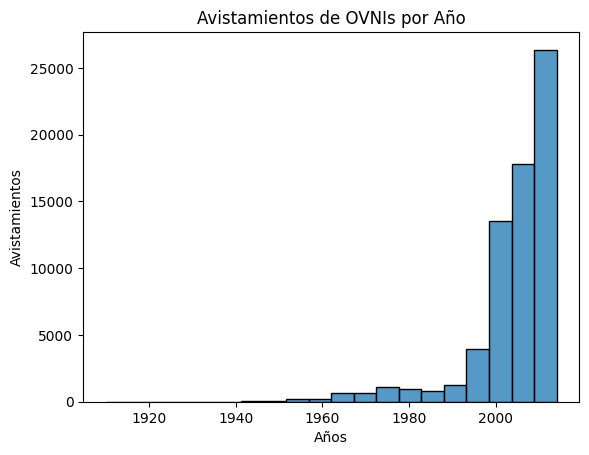

In [14]:
# @title
# Avistamientos por año
"""
Graficamos a través de seaborn la cantidad de avistamientos que hubo desde el inicio según la información del dataset
"""

sns.histplot (data=df, x="Year", bins=20) #Generamos un histograma con la infomración de nuestro dataset, utilizando como variable x el año y utilizando una escala de 20.
plt.title('Avistamientos de OVNIs por Año') #Título del gráfico
plt.xlabel('Años') #Nombre del eje X
plt.ylabel('Avistamientos') #Nombre del eje Y
plt.show()

Esto podría indicarnos que estos avistamientos
no serían más que tecnología aérea nueva, desarrollada en privado y que ha sorprendido a quienes la han visto en acción.
En conclusión, tendría sentido decir que, es lógico observar en el cielo nuevos objetos que al momento eran desconocidos, ya que las grandes empresas y los países se encuentran todo el tiempo desarrollando nuevas herramientas para utilizar. Siguiendo con este lineamiento, no parece ser correcto inferir que estos objetos voladores provengan del exterior de la Tierra.

## Tipos de objetos

A continuación, con el fin de obtener mayor información respecto a lo observado, generamos un gráfico basado en los tipos de OVNIs.
En la imagen se observan los avistamientos de OVNIs según cada tipo de OVNI y, determinado por colores, en que estación del año se dio dicho avistamiento.

Aquí podemos ver que el tipo de OVNI más visto es el 'light', que implica una luz. Es decir, lo que más se vio fue una luz a la cual no se le pudo determinar una forma.
En segundo lugar, podemos encontrar la forma de triángulo y en tercer lugar la de circulo (comúnmente la más utilizada en películas).

Además, podríamos decir a simple vista que en verano y otoño es cuando más se dan estos avistamientos, concurrente con los períodos donde la gente dispone de más tiempo libre.

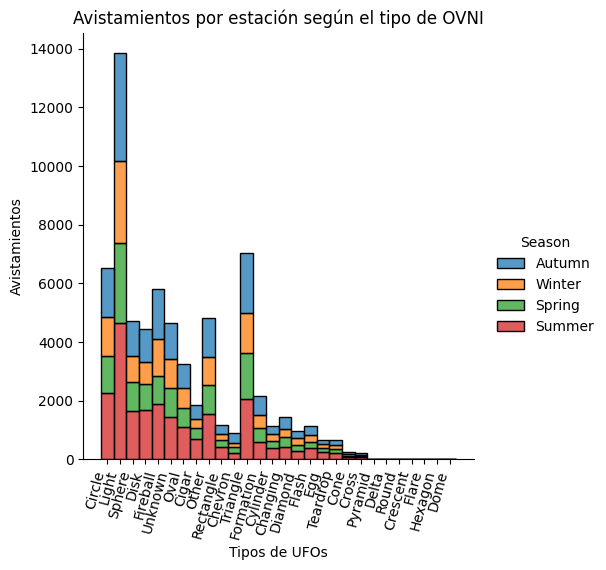

In [15]:
# @title
# Formas de UFOs
"""
Graficamos a través de seaborn la cantidad de avistamientos que hubo según las distintas formas de UFO registradas

Con la información de nuestro df, utilizamos como variable X la forma del OVNI
También le pedimos que nos distinga por Seasons del año para poder diferenciar cuantos avistamientos corresponden a cada temporada.
Además le pedimos que los muestre por acumulados en lugar de que se pisen.
"""
sns.displot (data=df, x="UFO_shape", hue="Season", multiple="stack")
plt.title('Avistamientos por estación según el tipo de OVNI') #Título del gráfico
plt.xlabel('Tipos de UFOs') #Nombre del eje X
plt.ylabel('Avistamientos') #Nombre del eje Y
plt.xticks(rotation=75, ha='right') #Inclinar los nombres del eje X en 75° a la derecha
plt.show()


En base a lo mencionado, podríamos decir que, tras analizar la información incluida en este gráfico, pierde poder la hipótesis de que los OVNIs efectivamente existan, ya que lo más visto es una simple luz que podría deberse a distintos factores, no necesariamente relacionados con objetos voladores.

Respecto al momento en que hubo más avistamientos (en verano), podríamos concluir en sentido contrario a lo mencionado antes. En primer lugar, es lógico observar más el cielo en verano ya que es cuando la mayoría de las personas se encuentra de vacaciones y al mismo tiempo, podríamos decir que es el momento del año donde más despejado está el cielo lo cual permitiría una mejor visión.

## OVNIs según el mes?

En el siguiente gráfico se muestra que tipo de OVNI fue observado en cada mes.
Según nuestro dataset podemos ver que hay ciertos tipos que solo han aparecido en un mes específico.


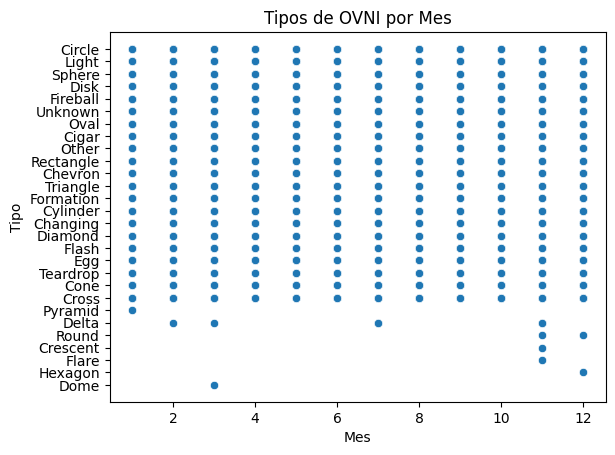

In [16]:
# @title
# Tipo de OVNI por mes
"""
Graficamos a través de seaborn que tipos de OVNIs fueron vistos en cada mes
"""
sns.scatterplot(data=df, x="Month", y="UFO_shape")
plt.title('Tipos de OVNI por Mes') #Título del gráfico
plt.xlabel('Mes') #Nombre del eje X
plt.ylabel('Tipo') #Nombre del eje Y
plt.show()

Esta información es más una curiosidad que un gran aporte a nuestra conclusión sobre los avistamientos, pero no está mal remarcar que
si existen ciertos tipos de objetos que solo se vieron en un mes en particular como es el caso del domo o el hexágono.

## ¿Cuánto tiempo lo viste?

Volviendo a información más relevante para nuestro análisis, a continuación, podemos apreciar el tiempo durante el cual se pudo apreciar el avistamiento.

Como vemos, esta duración fue cambiando a lo largo de la historia, siendo el avistamiento más largo alrededor de 1981/2.

Este gráfico podría llamar la atención, ya que, mientras más nos acercamos a la actualidad, donde la tecnología ha avanzado cada vez más, es relativamente menor el tiempo de avistamiento.

Aclaración: el eje “Y” se encuentra en segundos pero en escala logarítmica para poder apreciar mejor el gráfico.


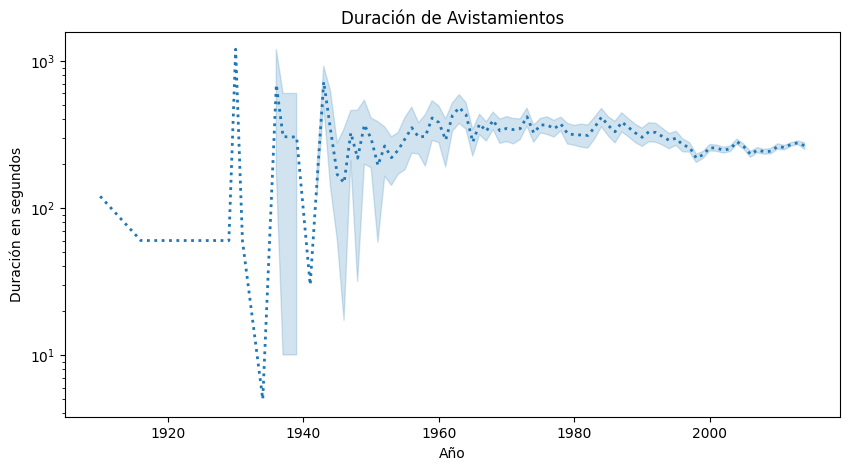

In [17]:
# @title
# Duración
plt.figure(figsize=(10,5)) #Definimos el tamaño de la imagen
sns.lineplot(data=df, x="Year", y="length_of_encounter_seconds", linewidth=2, linestyle=":") #Declaramos las variables a utilizar y le pedimos que las muestre en forma de puntos (:) con un ancho de 2
plt.yscale('log') #Utilizamos una escala logarítmica para el eje Y
plt.title('Duración de Avistamientos') #Título del gráfico
plt.xlabel('Año') #Nombre del eje X
plt.ylabel('Duración en segundos') #Nombre del eje Y
plt.show()

Siguiendo en el mismo sentido, a continuación, podemos observar que la mayor cantidad de avistamientos, se dieron por escaso tiempo.



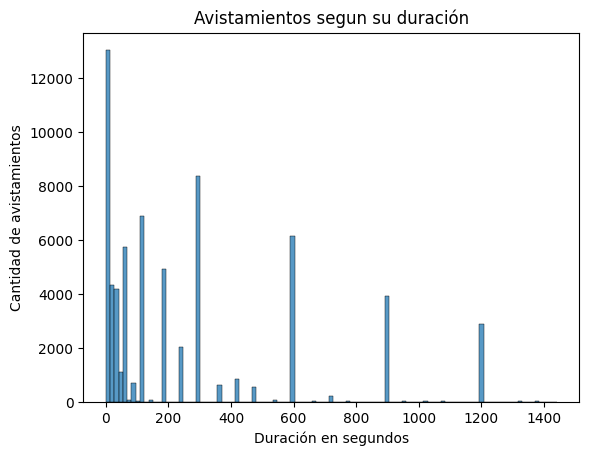

In [18]:
# @title
# Según duración
sns.histplot (data=df, x="length_of_encounter_seconds") #Utiliamoz la variable de duración de avistamiento para observar la cantidad de avistamientos en base a la duración
plt.title('Avistamientos segun su duración') #Título del gráfico
plt.xlabel('Duración en segundos') #Nombre del eje X
plt.ylabel('Cantidad de avistamientos') #Nombre del eje Y
plt.show()

De esta información podríamos dar lugar a dos conclusiones: La primera es que al tener más detalle de lo que vemos, lo que podemos determinar cómo OVNI son objetos que no tuvimos el tiempo necesario para observar.

Sin embargo y en contrario, la segunda conclusión podría llevarnos a que a causa también de los avances tecnológicos, no solo la tecnología de los OVNIs debería haber mejorado, sino que, como sociedad, cada vez nos encontramos más inmersos en nuestro mundo "tecnológico" y cada vez es mayor la contaminación lumínica por lo cual dificulta la visibilidad de estos objetos voladores no identificados y por ende disminuye el tiempo de las observaciones.


---

Continuando con la duración de los avistamientos, a continuación, quisimos observar en que época/estación del año se avistaron más OVNIs medidos en segundos de avistamiento.

Como vemos y en concordancia con lo que mencionábamos en anteriores gráficos, donde más tiempo se avistaron OVNIs fue en verano.
Si bien otoño le sigue, podemos ver que la desviación de los avistamientos (representado con la línea vertical negra) es ampliamente superior
indicando que los tiempos de avistamiento han variado mucho. Algunas veces han sido los avistamientos más largos y otras los más cortos de toda nuestra muestra.
Por último, cabe resaltar que, en invierno, si bien fue donde menos tiempo se avistaron los OVNIs, también fue el que menor desvío tuvo entre las observaciones.

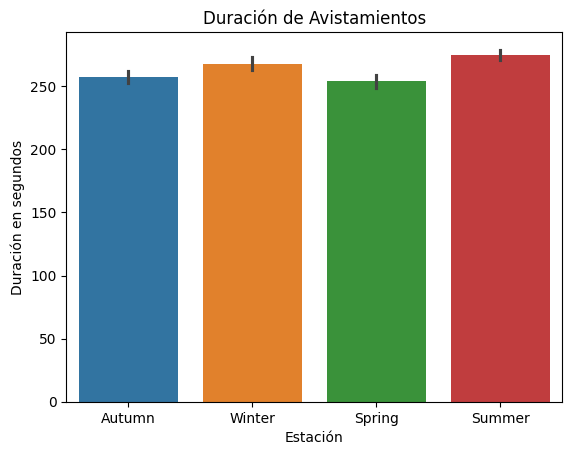

In [19]:
# @title
# Por estación
sns.barplot(data=df, y="length_of_encounter_seconds", x="Season", hue="Season") #Vemos el tiempo de duración acumulado por cada estación. Además le pedimos que los pinte también por estación para que se aprecie más.
plt.title('Duración de Avistamientos') #Título del gráfico
plt.xlabel('Estación') #Nombre del eje X
plt.ylabel('Duración en segundos') #Nombre del eje Y
plt.show()

Como ya hemos concluido anteriormente es lógico que el mayor tiempo de observación sea en verano ya que es cuando se observa más el cielo porque la mayoría de las personas se encuentra con tiempo disponible para hacerlo. Además, es el momento del año donde más despejado está el cielo lo cual permitiría una mejor visión.

##Agrupación de avistamientos

De forma más gráfica, podemos ver la distribución de los avistamientos a lo largo de los años.
Además, se distingue la estación del año en la que se vieron lo avistamientos.


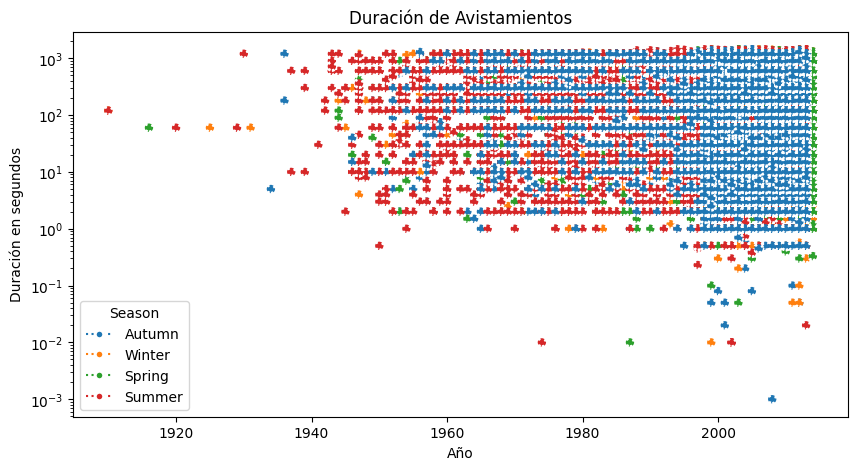

In [20]:
# @title
# Agrupación de avistamientos
plt.figure(figsize=(10,5)) #Definimos tamaño de la imagen
sns.scatterplot(data=df, x="Year", y="length_of_encounter_seconds", linewidth=2, linestyle=":", hue='Season') #Utilizando el año y la duración como variables, graficamos usando el estilo de puntos y el color por estación
plt.yscale('log') #Escala logarítmica al eje Y
plt.title('Duración de Avistamientos') #Título del gráfico
plt.xlabel('Año') #Nombre del eje X
plt.ylabel('Duración en segundos') #Nombre del eje Y
plt.show()

Debido a la cantidad de observaciones, es difícil, a simple vista, concluir cual color es predominante. Sin embargo, y en concordancia con lo que venimos mencionando, está claro que la mayor cantidad esta entre rojo y azul.


###Normalización



En el siguiente código, normalizamos los segundos de avistamiento.

In [21]:
# @title
# Normalización
"""
Normaliza las columnas de un DataFrame entre 0 y 1.

Parámetros:
df (DataFrame): El DataFrame que se va a normalizar.

Retorna: El DataFrame normalizado.

"""
def normalize(df):
    result = df.copy()
  # Itera sobre cada columna del DataFrame
    for feature_name in df.columns:
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
    # Normaliza la columna y asigna el resultado a la columna correspondiente en el DataFrame copiado
        result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)

    return result # Retorna el DataFrame normalizado

segnorm = normalize(df[['length_of_encounter_seconds']]) #Le asigno el nombre de segnorm a mi columna normalizada

##Relación entre avistamientos y duración

Con los siguientes dos gráficos, podemos ver que hay ciertos meses del año donde los avistamientos son más propensos como son junio y agosto.
Sin embargo, en el mes de julio podemos ver que hay una relación inversa entre la cantidad de avistamientos y la duración de los mismos.
Siendo el mes con mayor cantidad de avistamientos, pero con menos duración de dichos avistamientos.


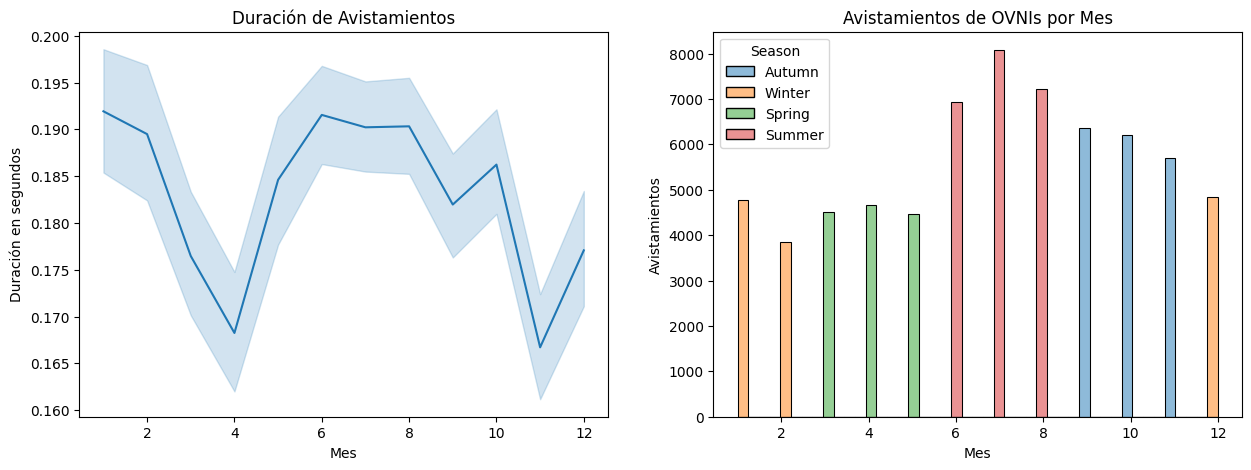

In [22]:
# @title
# Relación
plt.figure(figsize=(15,5)) #Defino tamaño de la imagen

plt.subplot(121) #Defino el primer gráfico

sns.lineplot(x=df['Month'], y=segnorm['length_of_encounter_seconds'])
plt.title('Duración de Avistamientos') #Título del gráfico
plt.xlabel('Mes') #Nombre del eje X
plt.ylabel('Duración en segundos') #Nombre del eje Y

plt.subplot(122) #Defino el segundo gráfico

sns.histplot (data=df, x="Month", hue='Season')
plt.title('Avistamientos de OVNIs por Mes') #Título del gráfico
plt.xlabel('Mes') #Nombre del eje X
plt.ylabel('Avistamientos') #Nombre del eje Y

plt.show()

Es difícil concluir en favor de la existencia de OVNIs, sobre todo extraterrestres, cuando en el mes donde mayores avistamientos se dieron, los mismos fueron por escasos segundos.

En este mismo sentido y tal como venimos mencionando es reconocible la diferencia en avistamientos dependiendo las estaciones del año, dejando demostrado que en el momento donde las personas tienen más tiempo libre es cuando más se dan estos "avistamientos".

##La hora de los OVNIs

En el siguiente gráfico, se detalla la cantidad de observaciones de OVNIs que se dieron a lo largo de la historia en las distintas horas del día.

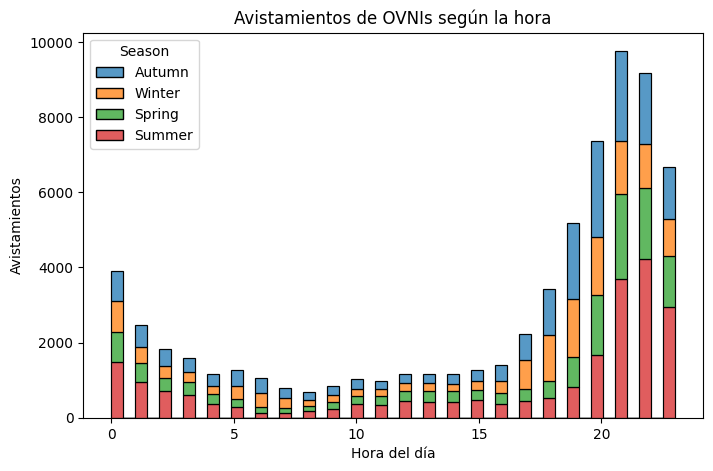

In [23]:
# @title
# Horario
plt.figure(figsize=(8,5)) #Defino tamaño de la imagen
sns.histplot (data=df, x="Hour", hue="Season", multiple="stack")
plt.title('Avistamientos de OVNIs según la hora') #Título del gráfico
plt.xlabel('Hora del día') #Nombre del eje X
plt.ylabel('Avistamientos') #Nombre del eje Y
plt.show()

Se podría decir que este gráfico evidencia lo lógico. Es lógico que la hora donde mayores avistamientos haya sea durante la noche, en primer lugar, porque es el momento del día donde es posible mirar el cielo.

En segundo lugar, la gente aprecia el hecho de ver las noches estrelladas y disfrutar la vista.

Por último, es lógico pensar que si se necesita volar o probar una nueva tecnología uno lo haría de noche donde las personas se encuentran durmiendo o cenando y siendo el momento donde la oscuridad puede dar reparo a lo que sea que esté pasando en el cielo.

Así mismo, y contrario a la teoría sobre la existencia de estos objetos, es más fácil durante la noche, confundir lo que uno ve.
Es decir, uno puede observar más fácilmente en medio de la oscuridad una luz (recordemos que fue el objeto más visto) pero es más difícil identificarla como un objeto ya que puede ser parte del firmamento, algún fenómeno meteorológico o simplemente un avión/objeto volador de los ya conocidos.


---

#**EDA con Pandas Profiling**

El objetivo de este análisis con Pandas Profiling es proporciona una visión general rápida y completa del conjunto de datos, incluyendo estadísticas descriptivas básicas, distribuciones de variables, valores perdidos, correlaciones entre variables y más. Esto resulta de utilidad para comprender la estructura y la calidad de los datos.

In [24]:
# @title
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 17.8 MB 36.8 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357942 sha256=55c86da14bce86e82463fa32b89aba3dde1aada2aa19269ebc88cde85feeb4d2
  Stored in directory: /tmp/pip-ephem-wheel-cache-alf4patb/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=949135aa9cfd297a71e6166eaf1ee04287758d92602567758743ef34707c6875
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098e

In [25]:
# @title
#Data Profiling
import pandas_profiling

profile = pandas_profiling.ProfileReport(df)
profile

Output hidden; open in https://colab.research.google.com to view.

#**Selección de Modelo Predictivo**

A continuación, realizamos modelos de IA para determinar que modelo utilizar y asi luego calcular cuánto tiempo durará el próximo avistamiento.

##Preparación de datos

Para trabajar con nuestros modelos predictivos primero realizamos ciertos ajustes a la base de datos para traer solo los valores numéricos que los modelos puedan utilizar para su predicción y a su vez eliminar la variable objetivo

In [26]:
# @title
# Importamos librerías
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime, timedelta
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tkinter import *

In [27]:
# @title
# Nuevo DataFrame
ndf = df.drop('length_of_encounter_seconds', axis=1) #Definimos un nuevo dataframe quitando nuestro valor objetivo
ndf['fecha_ordinal'] = ndf['Date_time'].apply(lambda x: x.toordinal()) #Pasamos nuestra fecha a número ordianl para poder utilizarla
ndf = ndf.select_dtypes(include=[np.number]) #Determinamos que solo nos quedamos con las variables numéricas de nuestro df

X = pd.DataFrame(ndf) #Nuestros datos (que sería nuestro nuevo df)
Y = df['length_of_encounter_seconds'] #Nuestra variable objetivo

##Modelo de Regresión lineal

In [28]:
# @title
# Entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #Defino mis variables a entrenar y a testear con el método train_test_split
model = LinearRegression() #Le pido que trabaje con una regresión lineal
model.fit(X_train, y_train) #Ahora entrenamos el modelo

preds = model.predict(X_test)
preds

array([302.9585192 , 296.37539554, 266.07448022, ..., 264.50916316,
       278.18263964, 243.11308104])

###Métricas

In [29]:
# @title
# Calcular MAE
lr_mae = (mean_absolute_error(y_test, preds))
print("Linear Regression MAE", lr_mae)

Linear Regression MAE 248.7980589716822


In [30]:
# @title
# Calcular RMSE
lr_rmse=np.sqrt(mean_squared_error(y_test, preds))
print("Linear Regression RMSE:", lr_rmse)

Linear Regression RMSE: 325.02862196451827


In [31]:
# @title
# Calcular R^2
lr_r2 = r2_score(y_test, preds)
print("Linear Regression R^2 Score:", lr_r2)

Linear Regression R^2 Score: 0.003407433028095319


##Modelo de Ridge Regression

In [32]:
# @title
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)

ridge_preds = ridge_model.predict(X_test)
ridge_preds

array([302.98752841, 296.36699778, 266.07113208, ..., 264.501696  ,
       278.16481113, 243.14188255])

###Métricas

In [33]:
# @title
# Calcular MAE
ridge_mae = (mean_absolute_error(y_test,ridge_preds))
print("Ridge Regression MAE", ridge_mae)

Ridge Regression MAE 248.79798630796515


In [34]:
# @title
# Calcular RMSE
ridge_rmse=np.sqrt(mean_squared_error(y_test, ridge_preds))
print("Ridge Regression RMSE:", ridge_rmse)

Ridge Regression RMSE: 325.0283716780926


In [35]:
# @title
# Calcular R^2
ridge_r2 = r2_score(y_test, ridge_preds)
print("Ridge Regression R^2 Score:", ridge_r2)

Ridge Regression R^2 Score: 0.0034089678682822644


##Modelo Gradient Boosting Regressor

In [36]:
# @title
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

gb_preds = gb_model.predict(X_test)
gb_preds

array([280.63063207, 342.38219464, 238.60779188, ..., 238.26526149,
       265.33565929, 233.64620813])

###Métricas

In [37]:
# @title
# Calcular MAE
gb_mae = (mean_absolute_error(y_test,gb_preds))
print("Gradient Boosting MAE", gb_mae)

Gradient Boosting MAE 247.24875607278904


In [38]:
# @title
# Calcular RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_preds))
print("Gradient Boosting RMSE:", gb_rmse)

Gradient Boosting RMSE: 323.5311017495296


In [39]:
# @title
# Calcular R^2
gb_r2 = r2_score(y_test, gb_preds)
print("Gradient Boosting R^2 Score:", gb_r2)

Gradient Boosting R^2 Score: 0.012569576732007537


##Modelo Random Forest Regressor

In [40]:
# @title
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_preds

array([407.735 , 227.77  , 194.07  , ..., 368.37  , 235.185 , 187.4615])

###Métricas

In [41]:
# @title
# Calcular MAE
rf_mae = (mean_absolute_error(y_test,rf_preds))
print("Random Forest MAE", rf_mae)

Random Forest MAE 251.72911456980097


In [42]:
# @title
# Calcular RMSE
rf_rmse=np.sqrt(mean_squared_error(y_test, rf_preds))
print("Random Forest RMSE:", rf_rmse)

Random Forest RMSE: 327.18680395724897


In [43]:
# @title
# Calcular R^2
rf_r2 = r2_score(y_test, rf_preds)
print("Random Forest R^2 Score:", rf_r2)

Random Forest R^2 Score: -0.00987120589191881


##Comparativa entre modelos

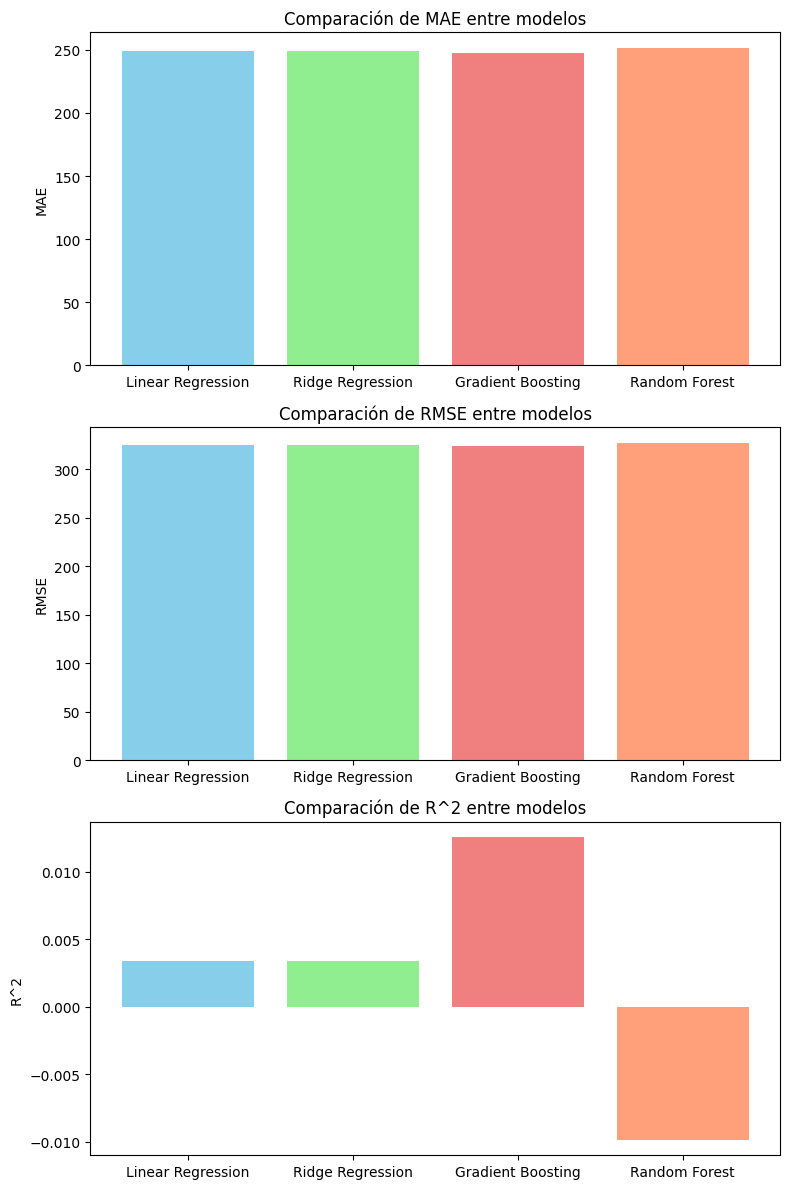

In [44]:
# @title
# Definir los nombres de los modelos
model_names = ['Linear Regression', 'Ridge Regression', 'Gradient Boosting', 'Random Forest']

# Definir las métricas para cada modelo
mae_values = [lr_mae, ridge_mae, gb_mae, rf_mae]
rmse_values = [lr_rmse, ridge_rmse, gb_rmse, rf_rmse]
r2_values = [lr_r2, ridge_r2, gb_r2, rf_r2]

# Crear subplots para cada métrica
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Colores más claros
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Gráfico para MAE
axs[0].bar(model_names, mae_values, color=colors)
axs[0].set_ylabel('MAE')
axs[0].set_title('Comparación de MAE entre modelos')

# Gráfico para RMSE
axs[1].bar(model_names, rmse_values, color=colors)
axs[1].set_ylabel('RMSE')
axs[1].set_title('Comparación de RMSE entre modelos')

# Gráfico para R^2
axs[2].bar(model_names, r2_values, color=colors)
axs[2].set_ylabel('R^2')
axs[2].set_title('Comparación de R^2 entre modelos')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Basándonos en las métricas de evaluación, observamos que los modelos de regresión lineal, regresión Ridge y Gradient Boosting muestran un rendimiento moderado, con un MAE y RMSE relativamente altos. Sin embargo, no llegan a los niveles alcanzados por el modelo de Random Forest.

Si bien ninguno de los modelos presenta una mejora significativa en términos de MAE y RMSE, si se ve una gran diferencia en el coeficiente de determinación (R2). Mientras que el modelo de regresión lineal y el modelo de regresión Ridge presentan un R2 del 0,003, el modelo de Random Forest presenta un valor negativo de -0,009. Por su parte y destacando entre los demás modelos, el Gradient Boosting presenta un R2 de 0,012, siendo así el modelo que presenta la MAE y RMSE más bajos y el mejor R2.

Por lo tanto, para la tarea de predicción de avistamiento de OVNIs, el modelo Gradient Boosting parece ser la opción más adecuada debido a su mayor precisión y capacidad explicativa.

##Aplicando PCA

Realizamos una prueba aplicando PCA para ajustar nuestro modelo seleccionado (Gradient Boosting) y así determinar si es mejor realizar este ajuste o no.

In [47]:
# @title
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_PCA = sc.fit_transform(X_train)
X_test_PCA = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train_PCA = pca.fit_transform(X_train_PCA)
X_test_PCA = pca.transform(X_test_PCA)

gb_model_PCA = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model_PCA.fit(X_train_PCA, y_train)

gb_preds_PCA = gb_model_PCA.predict(X_test_PCA)
gb_preds_PCA

array([195.00856433, 336.20896169, 232.19097996, ..., 235.90702004,
       260.12235859, 250.3147773 ])

###Métricas PCA

In [53]:
# @title
# Calcular MAE
gb_mae_PCA = (mean_absolute_error(y_test,gb_preds_PCA))
print("Gradient Boosting PCA MAE", gb_mae_PCA)

Gradient Boosting PCA MAE 247.80884302989315


In [54]:
# @title
# Calcular RMSE
gb_rmse_PCA = np.sqrt(mean_squared_error(y_test, gb_preds_PCA))
print("Gradient Boosting PCA RMSE:", gb_rmse_PCA)

Gradient Boosting PCA RMSE: 324.0061924387174


In [56]:
# @title
# Calcular R^2
gb_r2_PCA = r2_score(y_test, gb_preds_PCA)
print("Gradient Boosting PCA R^2:", gb_r2_PCA)

Gradient Boosting PCA R^2: 0.009667454260809394


##¿Con o Sin PCA?

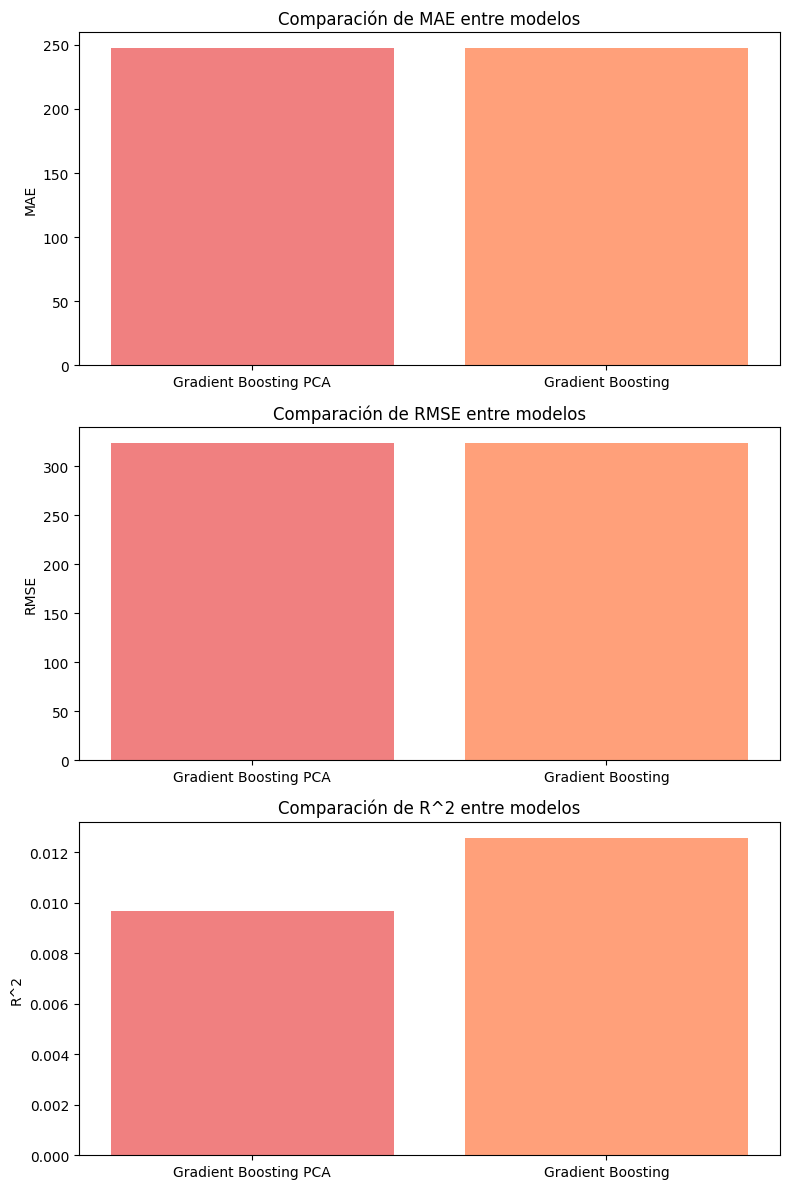

In [57]:
# @title
# Definir los nombres de los modelos
model_names = ['Gradient Boosting PCA', 'Gradient Boosting']

# Definir las métricas para cada modelo
mae_values = [gb_mae_PCA, gb_mae]
rmse_values = [gb_rmse_PCA, gb_rmse]
r2_values = [gb_r2_PCA, gb_r2]

# Crear subplots para cada métrica
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Colores más claros
colors = ['lightcoral', 'lightsalmon']

# Gráfico para MAE
axs[0].bar(model_names, mae_values, color=colors)
axs[0].set_ylabel('MAE')
axs[0].set_title('Comparación de MAE entre modelos')

# Gráfico para RMSE
axs[1].bar(model_names, rmse_values, color=colors)
axs[1].set_ylabel('RMSE')
axs[1].set_title('Comparación de RMSE entre modelos')

# Gráfico para R^2
axs[2].bar(model_names, r2_values, color=colors)
axs[2].set_ylabel('R^2')
axs[2].set_title('Comparación de R^2 entre modelos')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Al comparar entre el modelo básico de Gradinet Boosting y el modelo ajustado utilizando PCA, podemos observar que tal y como sucedía en los modelos anteriores las variaciones en MAE y RMSE son ínfimas (inferiores a 1 punto). La diferencia más notable se ve en el coeficiente de determinación (R2), al verse una disminución considerable en el modelo que utiliza PCA.

Por este motivo hemos decidido utilizar el modelo sin ajustar para nuestra predicción.


#**Predicción**

Según el modelo Gradient Boosting que entrenamos, al pedirle que prediga el próximo avistamiento, los resultados que arroja son:

In [48]:
# @title
#Modelo predictivo
"""
A través del modelo trabajado antes, vamos a predecir la próxima fecha y el el tiempo del próximo avistamiento
Para esto primero definimos el promedio de los intervalos de fecha para estimar la próxima fecha
Ese valor lo agregamos a nuestra última fecha.
Luego le pedimos que el modelo prediga nuestro próximo valor
"""
intervalos_ordinales = ndf['fecha_ordinal'].diff().dropna() #Calculamos intervalos de fechas sin NA
intervalos_ordinales = intervalos_ordinales[intervalos_ordinales != 0] #Quitamos los intervalos de 0
promedio_intervalos_ordinales = intervalos_ordinales.mean() #Calculamos el promedio
max_fecha_ordinal = X_test['fecha_ordinal'].max() #Asignamos nuestra última fecha
proxima_fecha_ordinal = max_fecha_ordinal + promedio_intervalos_ordinales #Le sumamos a la última fecha el promedio de intervalos
proxima_fecha = datetime.fromordinal(int(proxima_fecha_ordinal)) #Le pedimos que nos diga cual es la próxima fecha y que la considere como integral y la devuelva en formato fecha
print("El intervalo promedio entre los días es de:", promedio_intervalos_ordinales)
print("La próxima fecha del avistamiento según nuestro dataset sería:", proxima_fecha)
next_value = gb_model.predict(X_test) #Pedimos que prediga nuestro próximo valor (segundo de avistamiento)
print("El tiempo estimado que veremos el OVNI para la próxima fecha es:", next_value[0])


El intervalo promedio entre los días es de: 1.844932844932845
La próxima fecha del avistamiento según nuestro dataset sería: 2014-05-08 00:00:00
El tiempo estimado que veremos el OVNI para la próxima fecha es: 280.6306320705405


In [49]:
# @title
# Error cuadrático
mse = mean_squared_error(y_test, gb_preds) #Calculamos el error cuadrático medio en base a nuestra predicción
print(f"Error cuadrático medio en el conjunto de prueba: {mse:.2f}")

Error cuadrático medio en el conjunto de prueba: 104672.37


#**Noticias sobre avistamientos**

A continuación, podemos ver las últimas noticias en las que se mencionan “UFO” en los últimos años según la API utilizada

In [50]:
# @title
# Importar librerías
import requests
import json

In [51]:
# @title
# API
"""
A través de esta API podemos acceder a noticias en base a ciertos parámetros que definimos
En este caso se define que la noticia debe contener al palabra "UFO" y que debe estar en inglés
"""

url = ('https://newsapi.org/v2/everything?'
       'q=UFO&'
       'language=en&'

       'apiKey=e3419dd49ac64b90b1e599a5c6c4974b')

noti = requests.get(url)
print(noti)

<Response [200]>


In [52]:
# @title
# Json de la API
jsondata=json.loads(noti.text) #Define el dataset que adquirimos de nuestra API
noti=pd.DataFrame.from_dict(jsondata['articles']) #Le pedimos que nos traiga información en base a cierta columna
noti.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Gizmodo.com'}",Gordon Jackson and James Whitbrook,Steven Spielberg's Next Movie Could Bring Him ...,Werner Herzog has joined Bong Joon Ho’s myster...,https://gizmodo.com/steven-spielberg-next-movi...,"https://i.kinja-img.com/image/upload/c_fill,h_...",2024-04-18T13:00:00Z,Werner Herzog has joined Bong Joon Hos mysteri...
1,"{'id': None, 'name': 'GameSpot'}",Blair Marnell,Steven Spielberg Making UFO Movie With Jurassi...,"Over the last six decades, Steven Spielberg ha...",https://www.gamespot.com/articles/steven-spiel...,https://www.gamespot.com/a/uploads/screen_kubr...,2024-04-17T18:10:00Z,"Over the last six decades, Steven Spielberg ha..."
2,"{'id': None, 'name': 'Space.com'}",Sharmila Kuthunur,Western US residents report the most UFO sight...,Wide-open spaces of the western U.S. may partl...,https://www.space.com/ufo-sightings-western-un...,https://cdn.mos.cms.futurecdn.net/EVmKnfxNCELb...,2024-04-04T12:00:01Z,"Space is part of Future US Inc, an internation..."
3,"{'id': 'polygon', 'name': 'Polygon'}",Austen Goslin,Three-Body Problem’s best adaptation is secret...,"The Three-Body Problem is complicated, but the...",https://www.polygon.com/24112643/3-body-proble...,https://cdn.vox-cdn.com/thumbor/YOIYfdi46QuHyL...,2024-03-27T19:00:00Z,The shiny new adaptation of The Three-Body Pro...
4,"{'id': None, 'name': 'First Showing'}",Alex Billington,Fun Trailer for No Budget Sci-Fi Indie Comedy ...,"""This foil is holding you back"" Cranked Up Fil...",https://www.firstshowing.net/2024/fun-trailer-...,https://media2.firstshowing.net/firstshowing/i...,2024-04-17T14:42:13Z,"by Alex BillingtonApril 17, 2024Source:YouTube..."


En este caso, la API cuenta con las últimas noticias de fechas recientes por tanto no se adapta perfectamente a nuestro trabajo ya que nuestro dataset trabaja con fechas anteriores.

Hubiese sido una gran mejora haber conseguido una API con noticias antiguas y solicitarle que busque una noticia con la fecha que predijimos en nuestro modelo de forma tal de saber si ha acertado.

De todas formas, hemos de apreciar que al día de hoy aún siguen siendo comunes las noticias respectos a OVNIs.


---

#**Conclusión**

En conclusión, resulta desafiante respaldar la existencia de OVNIs, en especial cuando se los considera de origen extraterrestre. Esta conclusión se fundamenta en la naturaleza de los avistamientos, en su mayoría basados en "luces", y su ocurrencia en momentos y condiciones previsibles. Dada la falta de pruebas sólidas, afirmar su existencia se torna difícil. Sin embargo, al considerar la definición técnica de OVNI, es probable que en el cielo se avisten Objetos Voladores No Identificados, dada la continua evolución tecnológica y el potencial de tecnologías no reveladas al público. Por último, según el análisis predictivo basado en un dataset desactualizado, se estima que el próximo avistamiento de OVNI ocurrirá aproximadamente 1,8 días después del último registro, es decir, el 8 de mayo de 2014, con una duración estimada de 302,96 segundos.